In [27]:
#Course : CS 513 - Knowledge discovery and Data mining
#Course Instructor:- Khashayar Dehnad
#First Name: Keval
#Last Name: Sompura
#Id: 20033127
#MidTerm Exam: Q4

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [29]:
folder='C:/Users/Asus/OneDrive/Stevens/Sem-2/KDDM/Mid Term/'
file='hepatitis_A.csv'
data = pd.read_csv(folder+file,na_values='?')
data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Age_Quartile
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,1,Q1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,1,Q3
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,1,Q4
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,1,Q1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,1,Q2


In [30]:
data.isnull().sum()
data = data.dropna()

In [31]:
from sklearn.preprocessing import LabelEncoder

features = ['SEX', 'Age_Quartile', 'STEROID', 'FATIGUE', 'MALAISE']
target = 'Class'

label_encoder = LabelEncoder()
data['Age_Quartile'] = label_encoder.fit_transform(data['Age_Quartile'])

x = data[features]
y = data[target]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,train_size=0.7, random_state=74)

In [33]:
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

y_pred = cart_model.predict(X_test)

In [34]:
print("Accuracy: ")
print(cart_model.score(X_test, y_test))

Accuracy: 
0.7058823529411765


In [35]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 1  2]
 [ 8 23]]


In [36]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.11      0.33      0.17         3
           2       0.92      0.74      0.82        31

    accuracy                           0.71        34
   macro avg       0.52      0.54      0.49        34
weighted avg       0.85      0.71      0.76        34



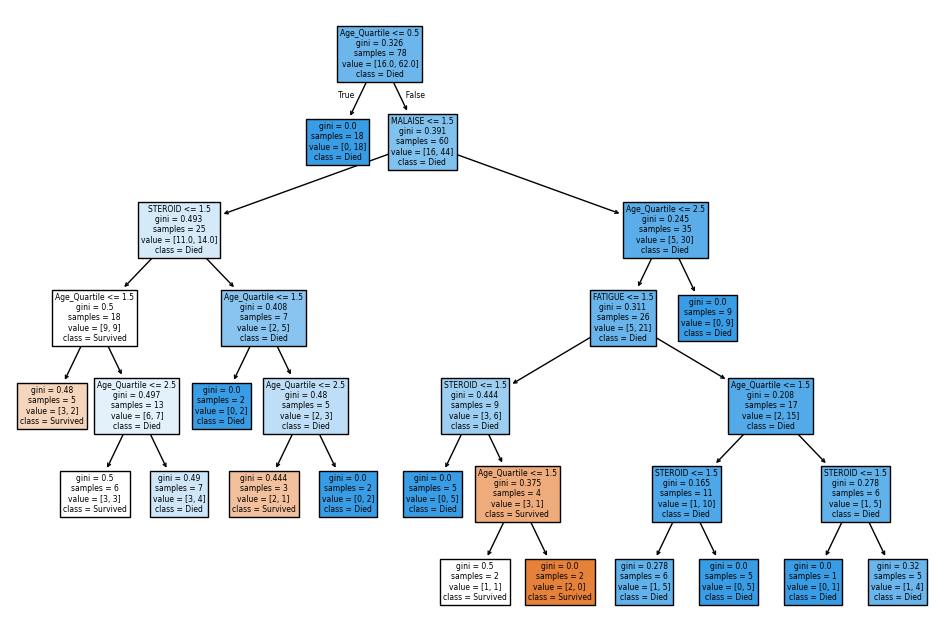

In [37]:
plt.figure(figsize=(12, 8))
plot_tree(cart_model, feature_names=features, class_names=['Survived', 'Died'], filled=True)
plt.show()